In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("wine_reviews.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   review  500 non-null    object
dtypes: object(1)
memory usage: 4.0+ KB


In [3]:
pip install transformers torch 

Note: you may need to restart the kernel to use updated packages.


In [4]:
from transformers import pipeline

# Load the zero-shot classification pipeline
classifier = pipeline("zero-shot-classification", model="MoritzLaurer/mDeBERTa-v3-base-mnli-xnli")

In [5]:
# Define candidate labels
labels = ["taste", "aroma", "packaging", "pricing", "overall satisfaction"]

In [6]:
# Test on a few reviews
reviews = df["review"].head(5)  # Replace "review" with the actual column name
for review in reviews:
    result = classifier(review, candidate_labels=labels)

In [7]:
print(f"Review: {review}")

Review: Great. Much different than other Sauv Blancs since it is aged in oak. After a few days open in the fridge, it was way better!


In [8]:
from transformers import pipeline
import pandas as pd

# Load the CSV file
wine_reviews = pd.read_csv("wine_reviews.csv")

# Initialize the zero-shot classification pipeline with the selected model
classifier = pipeline("zero-shot-classification", model="MoritzLaurer/mDeBERTa-v3-base-mnli-xnli")

# Define the candidate labels
labels = [
    "talks about food combinations",
    "talks about taste",
    "talks about value for money",
    "other"
]

# Define a function to classify a single review
def classify_review(review):
    result = classifier(review, candidate_labels=labels)
    return result["labels"][0], result["scores"][0]  # Return top label and confidence score

# Apply classification to all reviews in the dataset
wine_reviews["classification"], wine_reviews["confidence"] = zip(
    *wine_reviews["review"].apply(classify_review)
)

# Save the classified data to a new CSV file
wine_reviews.to_csv("classified_wine_reviews.csv", index=False)

# Display the first few rows of the output
print(wine_reviews.head())


                                              review  \
0  Easily the best Sauvignon Blanc I've had to da...   
1                      Excellent, Mockingbird Inn?\n   
2  Absolutely incredible. One of the best sauvign...   
3                   Reported in nytimes. Did not try   
4  Great. Much different than other Sauv Blancs s...   

                  classification  confidence  
0  talks about food combinations    0.465980  
1              talks about taste    0.576356  
2              talks about taste    0.774299  
3                          other    0.646307  
4                          other    0.566542  


In [9]:
# Load the CSV file
wine_reviews = pd.read_csv("wine_reviews.csv")

# Initialize the zero-shot classification pipeline
classifier = pipeline("zero-shot-classification", model="MoritzLaurer/mDeBERTa-v3-base-mnli-xnli")

# Define candidate labels
labels = [
    "talks about food combinations", 
    "talks about taste", 
    "talks about value for money", 
    "other"
]

# Define a function to classify each review
def classify_review(review):
    if not isinstance(review, str) or review.strip() == "":
        return "other"  # Handle empty or invalid reviews gracefully
    result = classifier(review, candidate_labels=labels)
    return result['labels'][0]  # Return the label with the highest confidence

# Apply the classification to each review in the dataset
wine_reviews["classification"] = wine_reviews["review"].apply(classify_review)  # Replace "review" with the actual column name in your CSV

# Save the classified reviews to a new CSV file
wine_reviews.to_csv("classified_wine_reviews.csv", index=False)

# Print a preview of the classified data
print(wine_reviews.head())


                                              review  \
0  Easily the best Sauvignon Blanc I've had to da...   
1                      Excellent, Mockingbird Inn?\n   
2  Absolutely incredible. One of the best sauvign...   
3                   Reported in nytimes. Did not try   
4  Great. Much different than other Sauv Blancs s...   

                  classification  
0  talks about food combinations  
1              talks about taste  
2              talks about taste  
3                          other  
4                          other  


C:\Users\DELL\AppData\Local\Temp\ipykernel_16916\1574921536.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category_counts.index, y=category_counts.values, palette="viridis")


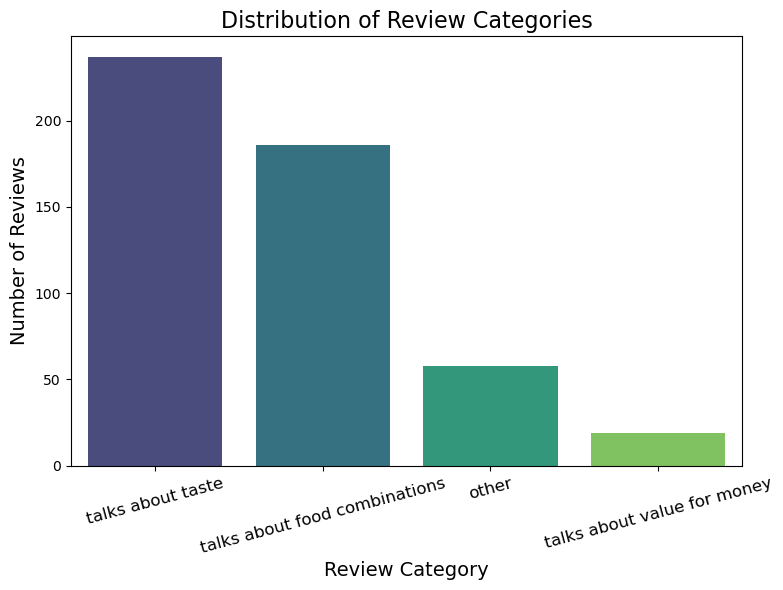

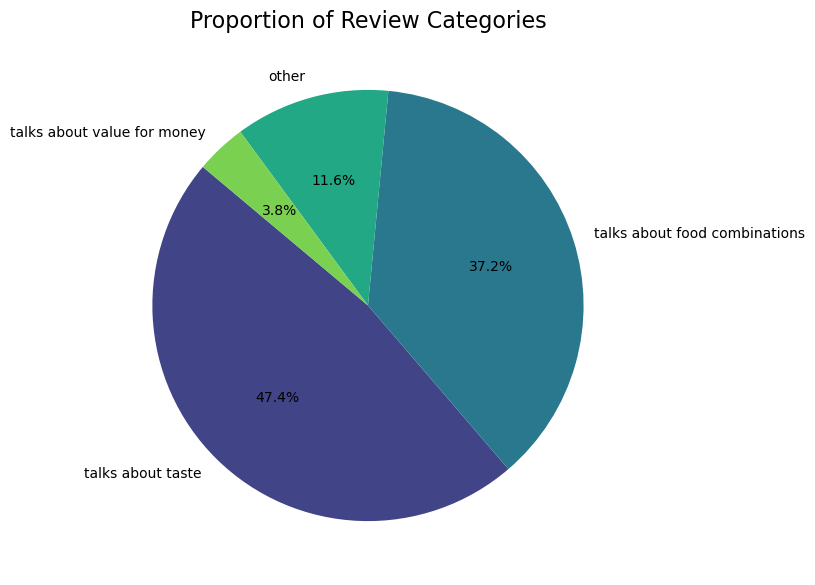

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Load the classified data
wine_reviews = pd.read_csv("classified_wine_reviews.csv")

# Count the number of reviews in each classification category
category_counts = wine_reviews["classification"].value_counts()

# Plot the data using a bar chart
plt.figure(figsize=(8, 6))
sns.barplot(x=category_counts.index, y=category_counts.values, palette="viridis")
plt.title("Distribution of Review Categories", fontsize=16)
plt.xlabel("Review Category", fontsize=14)
plt.ylabel("Number of Reviews", fontsize=14)
plt.xticks(rotation=15, fontsize=12)
plt.tight_layout()
plt.show()

# Optional: Pie chart for visualization
plt.figure(figsize=(7, 7))
plt.pie(
    category_counts.values,
    labels=category_counts.index,
    autopct="%1.1f%%",
    startangle=140,
    colors=sns.color_palette("viridis", len(category_counts))
)
plt.title("Proportion of Review Categories", fontsize=16)
plt.show()
